# Machine Learning: Assignment 3
## Decision Tree and Naive Bayes classification methods  (max. 10p)

In [7]:
# Write Your information in here
student_name = 'Juuso Leppänen'
student_email = "ad1885@student.jamk.fi"

In this assignment, we will build a diabetes prediction model.

We try to predict the occurrence of diabetes using the following three ML classification methods:
1. Decision Tree
2. Gaussian Naive Bayes
3. kNN

**Dataset**:

You can download the data from the following link: [https://www.kaggle.com/uciml/pima-indians-diabetes-database](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

Description of the data: *The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset.
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.*


## Assignment 3.1: Data preprocessing (1 p)

First, let's load the required Pima Indian Diabetes dataset into Pandas as CSV data.
You should use and name all the columns and drop the `label` column.

In [109]:
import pandas as pd

# Replace 'diabetes.csv' with the path to your downloaded file
file_path = 'diabetes.csv'
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

data = pd.read_csv(file_path, names=columns, header=0)  # header=0 if your CSV has column names

# Separate features and labels
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Check the first few rows
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Assignment 3.2: Decision Tree Classifier (3 p)

Try to predict the `label` value of the feature using other features with
1. Decision Tree,
2. Gaussian Naive Bayes and
3. kNN methods.

Split the data into training data and test data by split *80%/20%*.

Print the accuracy of the prediction, the confusion matrix and
how much different features affect the predicted variable according to the model (the importance of features).

Select the tree most important explanatory variables and print a scatter plot from them.

First implement the **Decision Tree classifier**.
* Let's divide the data into training and testing data sets and scale the numerical data.
* Then train with training data and test with testing data and get the accuracy of the model.

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Build a machine learning model with Decision Tree and test the model.

In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Split data (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy of Decision Tree: {round(acc_dt*100, 1)} %')

Accuracy of Decision Tree: 74.7 %


Let's 
* show the confusion matrix and
* print the importance of features.

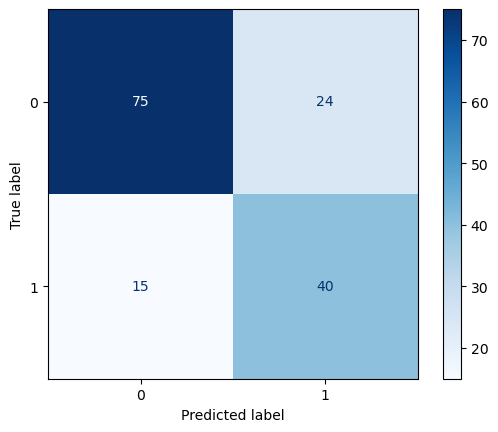

In [94]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)
disp.plot(cmap='Blues');

In [89]:
# Feature importance
importances = dt_model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print("Feature Importance:\n", feature_importance)

Feature Importance:
 Glucose                     0.314225
BMI                         0.170700
BloodPressure               0.147679
Age                         0.099215
DiabetesPedigreeFunction    0.083282
Insulin                     0.066253
SkinThickness               0.061164
Pregnancies                 0.057482
dtype: float64


Try to do some suitable visualization of the data.

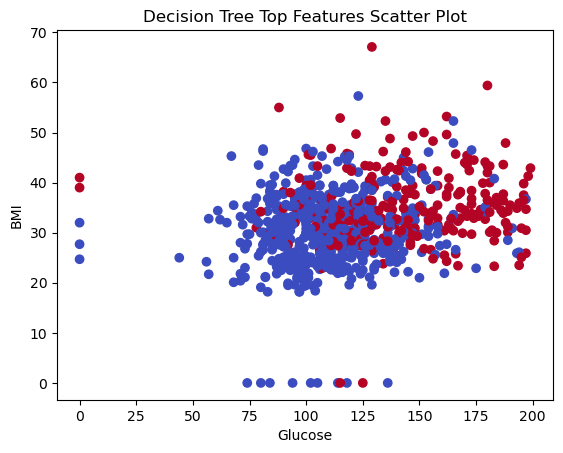

In [92]:
# Visualization: scatter plot of top 2 features
top_features = feature_importance.index[:2]
plt.scatter(df[top_features[0]], df[top_features[1]], c=df['Outcome'], cmap='coolwarm')
plt.xlabel(top_features[0])
plt.ylabel(top_features[1])
plt.title("Decision Tree Top Features Scatter Plot")
plt.show()

## Assignment 3.3: Naive Gaussian classifier (2 p)
Second implement of a machine learning classification model is the **Naive Gaussian classifier**.

* Let's divide the data into training and testing data sets and scale the numerical data.
* Then train with training data and test with testing data and get the accuracy of the model.



In [74]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Predict
y_pred_nb = nb_model.predict(X_test_scaled)

# Accuracy
acc_nb = accuracy_score(y_test, y_pred_nb)
print(f'Accuracy of Naive Bayes: {round(acc_nb*100, 1)} %')

Accuracy of Naive Bayes: 76.6 %


Now let's do Processing of results (naive Gaussian method) and show confusion matrix.

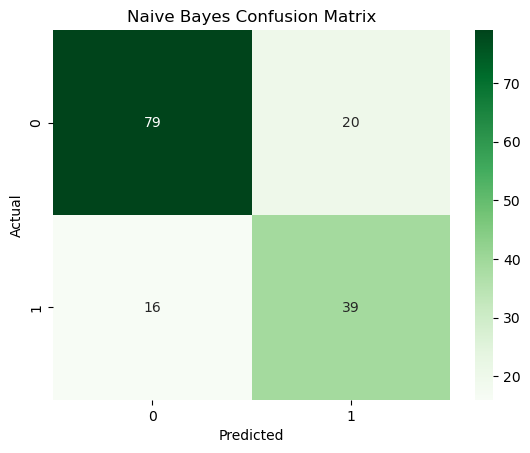

In [76]:
# Confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

## Assignment 3.4: kNN (2 p)

The third implement of a machine learning classification model is the **kNN classifier**.

* Let's divide the data into training and testing data sets and scale the numerical data.
* Then train with training data and test with testing data and get the accuracy of the model.

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train kNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors
knn_model.fit(X_train_scaled, y_train)

# Predict
y_pred_knn = knn_model.predict(X_test_scaled)

# Accuracy
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy of kNN: {round(acc_knn*100, 1)} %')

Accuracy of kNN: 69.5 %


Processing of results (kNN method) and show confusion matrix.

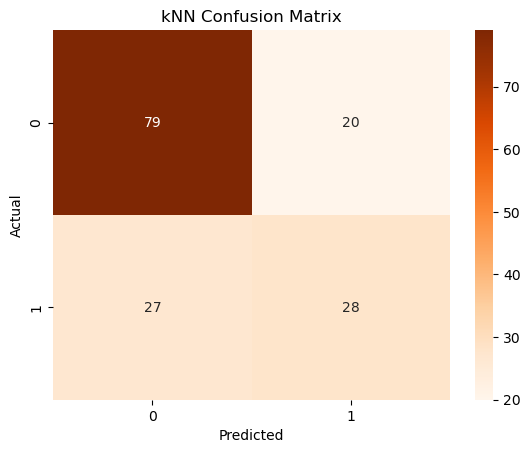

In [99]:
# Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('kNN Confusion Matrix')
plt.show()

## Assignment 3.5: Plotting the ROC curve (2p)

Also draw the ROC curves (with AUC) with three classification methods implemented:
1. decision tree
2. Gaussian
3. kNN

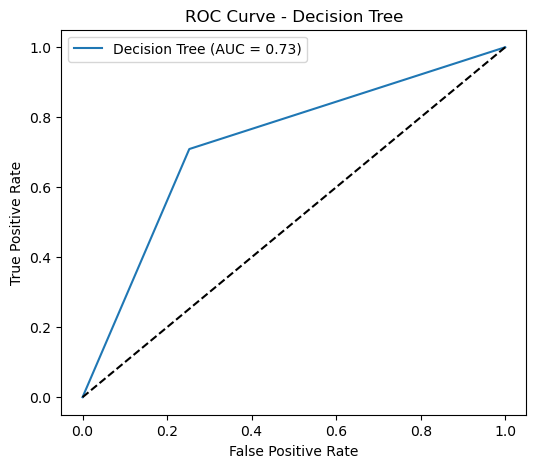

In [103]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ROC for Decision Tree
y_prob_dt = dt_model.predict_proba(X_test_scaled)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
auc_dt = roc_auc_score(y_test, y_prob_dt)

plt.figure(figsize=(6,5))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.show()

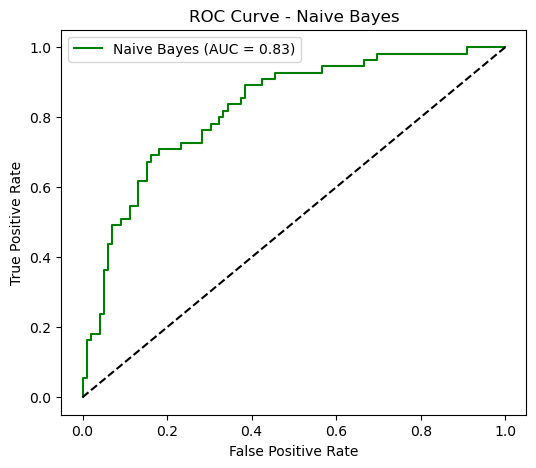

In [105]:
# ROC for Naive Bayes
y_prob_nb = nb_model.predict_proba(X_test_scaled)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
auc_nb = roc_auc_score(y_test, y_prob_nb)

plt.figure(figsize=(6,5))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})', color='green')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend()
plt.show()

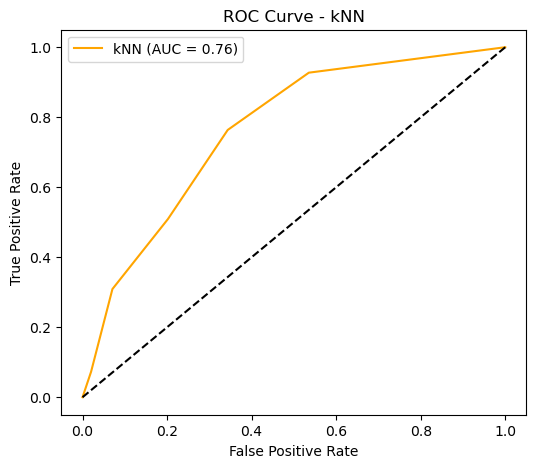

In [107]:
# ROC for kNN
y_prob_knn = knn_model.predict_proba(X_test_scaled)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
auc_knn = roc_auc_score(y_test, y_prob_knn)

plt.figure(figsize=(6,5))
plt.plot(fpr_knn, tpr_knn, label=f'kNN (AUC = {auc_knn:.2f})', color='orange')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - kNN')
plt.legend()
plt.show()

### Conclusion
* TODO: Write comparison and conclusion of the results you got.

Comparison of Classification Methods for Diabetes Prediction

Decision Tree  
Accuracy: 74.7%  
AUC: 0.73  
Pros: Captures non-linear relationships and interactions between features.  
Feature importance: Glucose, BMI, and Age are the most influential features.  

Gaussian Naive Bayes  
Accuracy: 76.6%  
AUC: 0.83  
Pros: Simple, fast, works well for small datasets.  
Limitation: Assumes independence of features, which may reduce performance.  

k-Nearest Neighbors (kNN)  
Accuracy: 69.5%  
AUC: 0.76  
Pros: Non-parametric, simple to implement.  
Limitation: Sensitive to scaling and choice of neighbors (k).  

Overall Conclusion:

Gaussian Naive Bayes achieved the highest accuracy (76.6%) and the highest AUC (0.83), indicating that it is the most effective at distinguishing between diabetic and non-diabetic patients in this dataset. Its simplicity and speed make it a strong choice, though it relies on the assumption that features are independent.

Decision Tree had slightly lower accuracy (74.7%) and AUC (0.73). While it captures non-linear relationships and interactions between features, its performance was somewhat lower than Naive Bayes. The model highlighted Glucose, BMI, and Age as the most influential features, which aligns with clinical expectations.

k-Nearest Neighbors (kNN) performed the worst in terms of accuracy (69.5%) and AUC (0.76). Its performance is highly dependent on proper scaling of features and the choice of the number of neighbors (k), which may explain the lower accuracy.